# PCA
Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.
Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.
Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.
Task 4: Clustering with PCA Data:
1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.
Task 5: Comparison and Analysis:
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.
Task 6: Conclusion and Insights

1.	Summarize the key findings and insights from the assignment.
2.	Discuss the practical implications of using PCA and clustering in data analysis.
3.	Provide recommendations for when to use each technique based on the analysis conducted.


In [1]:
#importing  necessary libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.


In [2]:
#loading the dataset

df=pd.read_csv("wine.csv")

df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


                                             |                                             | [  0%]   00:00 ->…


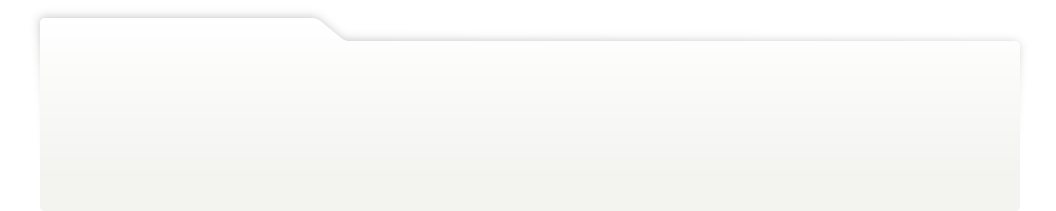
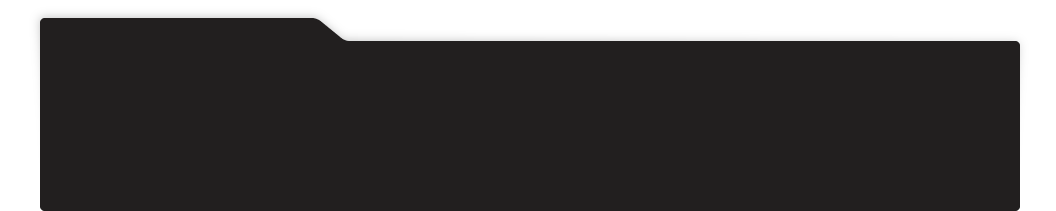
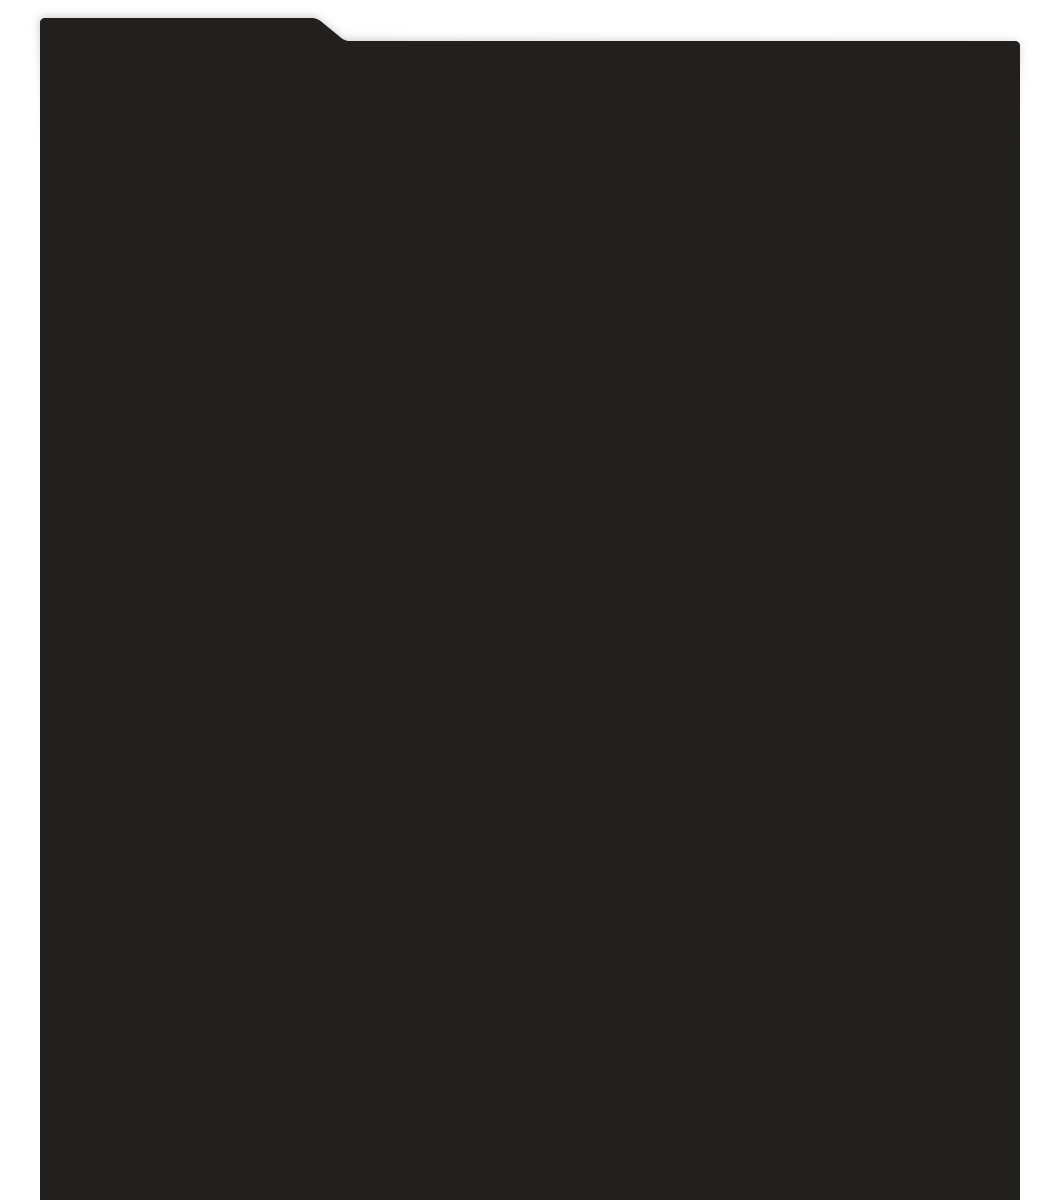
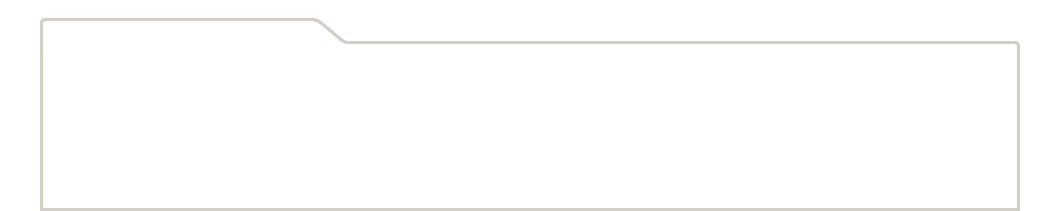
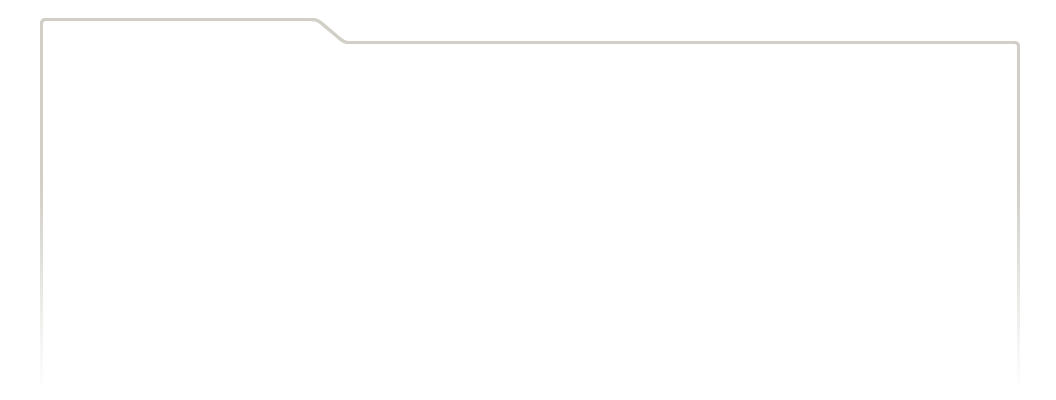
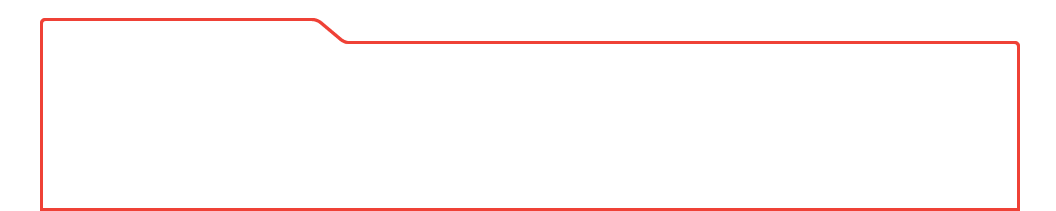
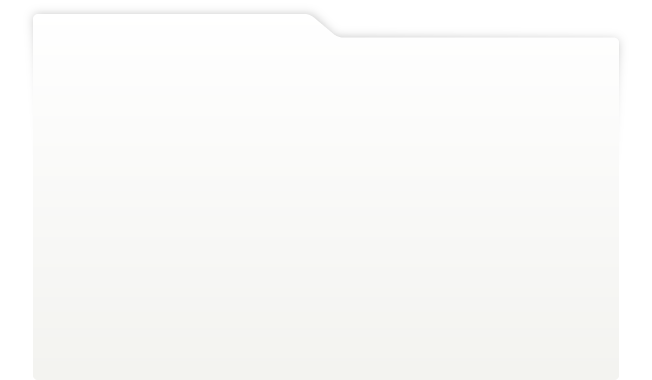
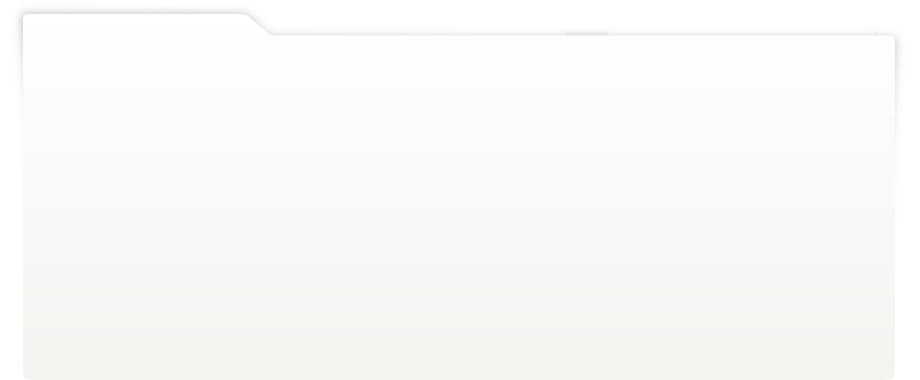
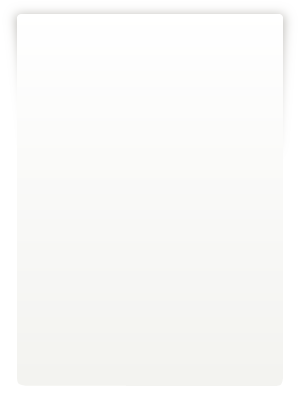
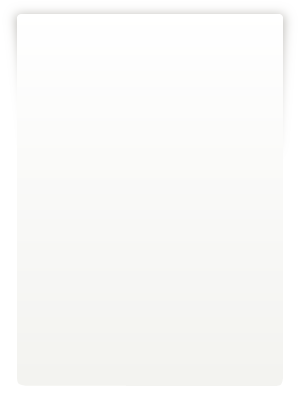
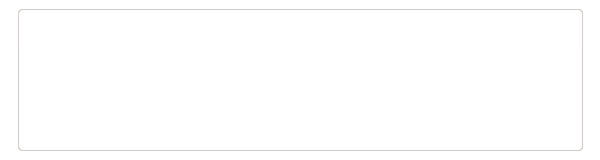
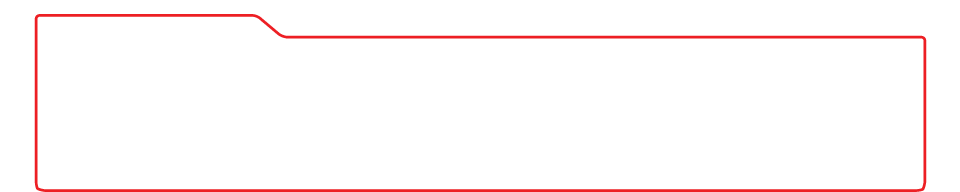
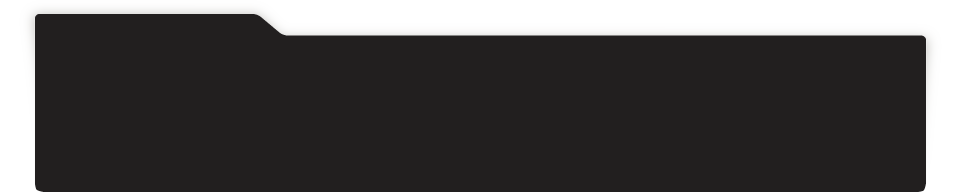
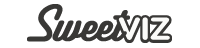
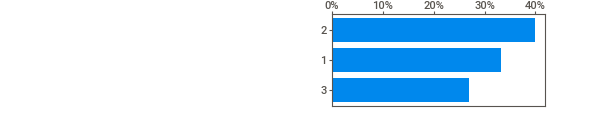
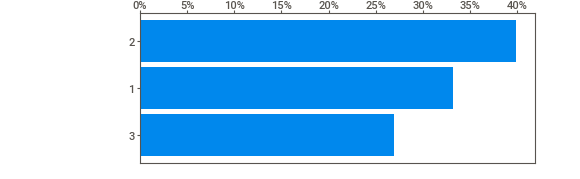
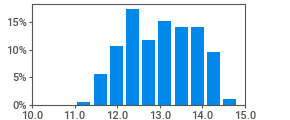
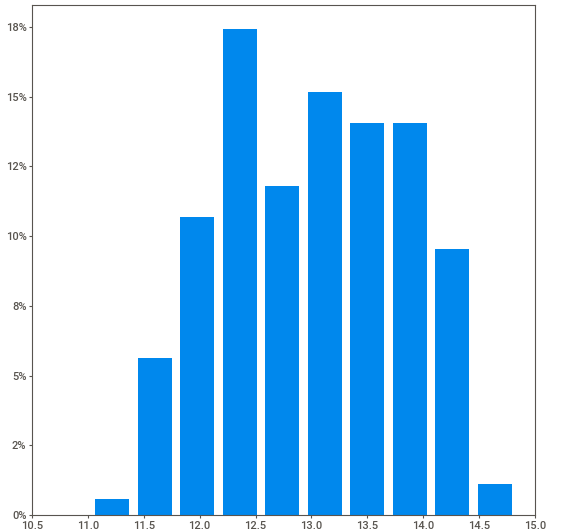
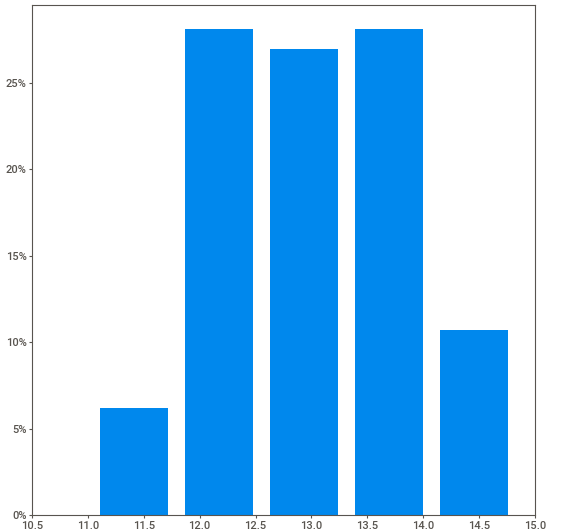
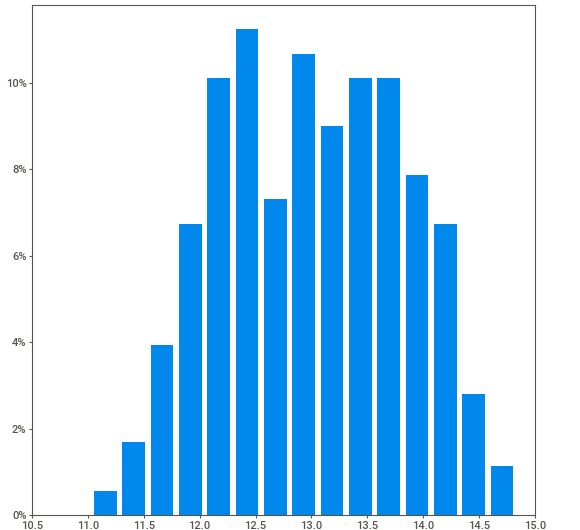
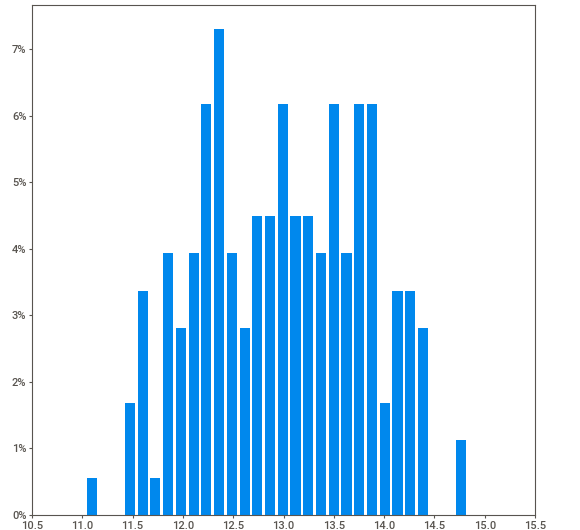
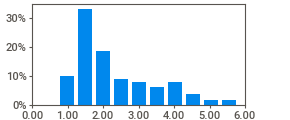
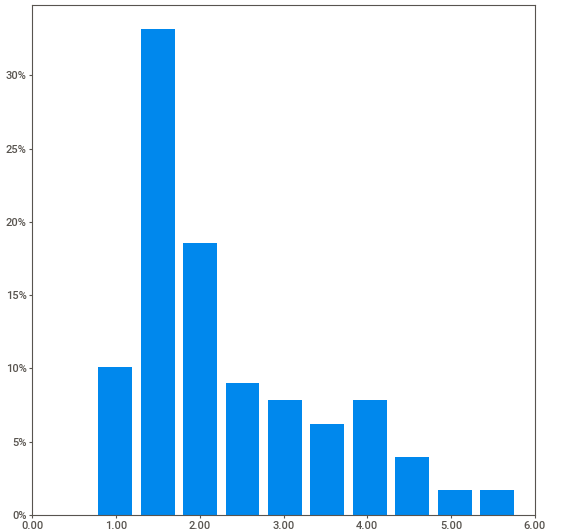
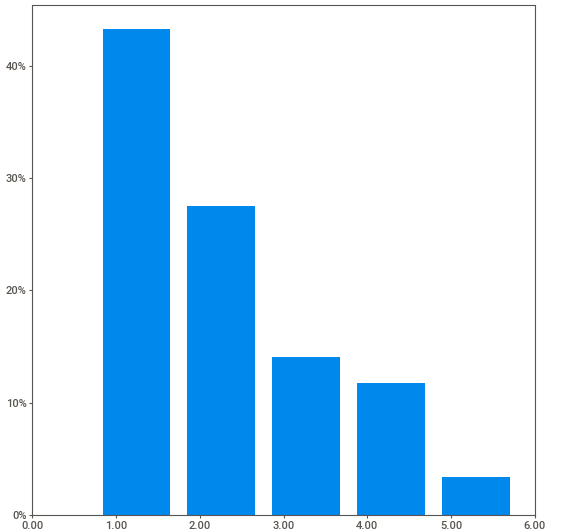
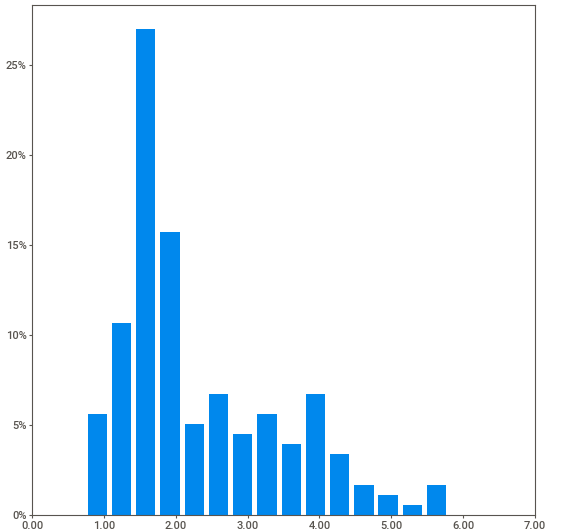
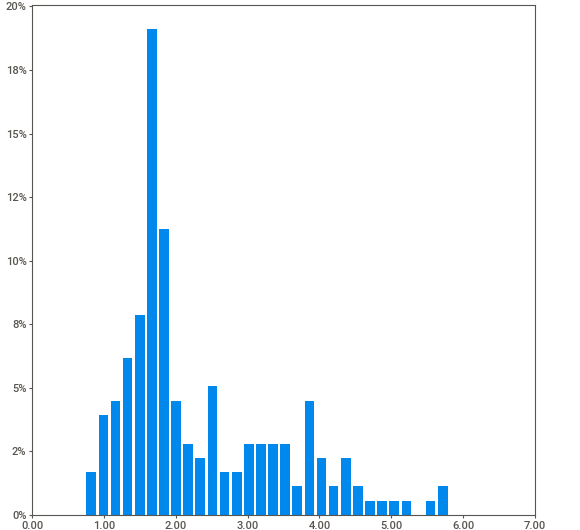
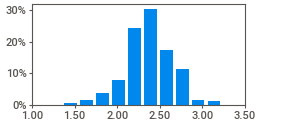
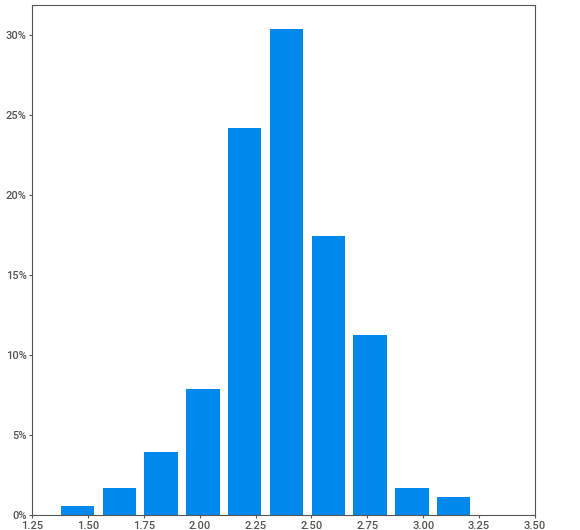
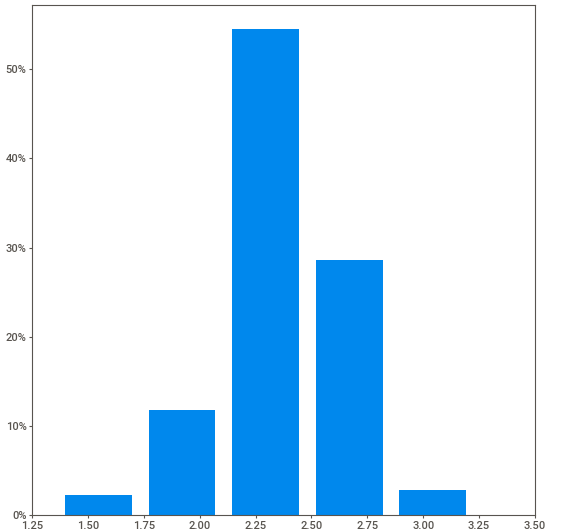
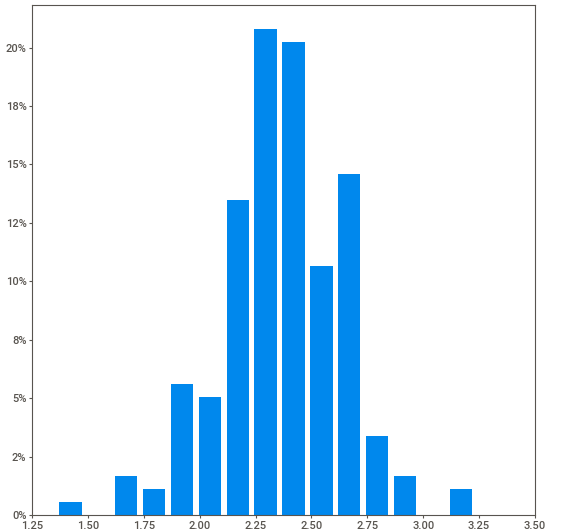
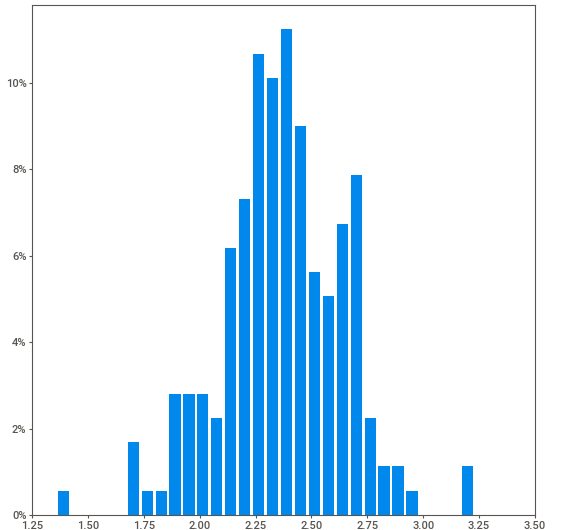
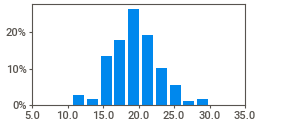
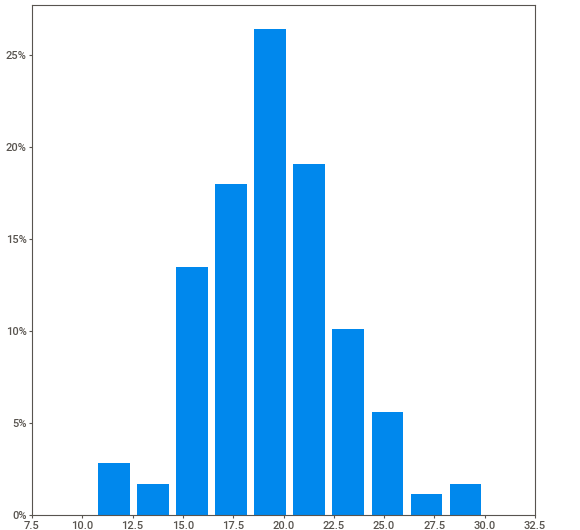
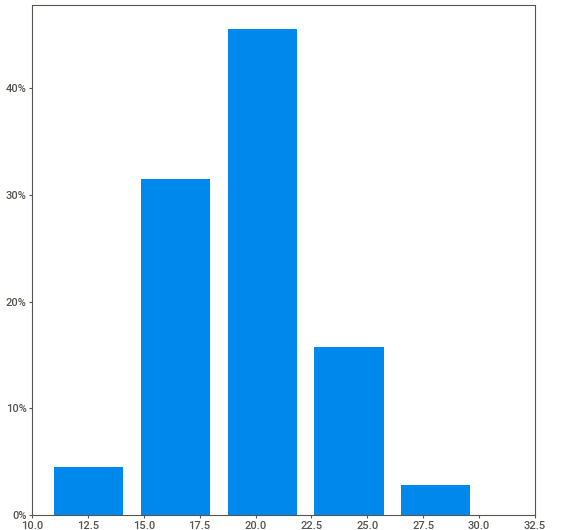
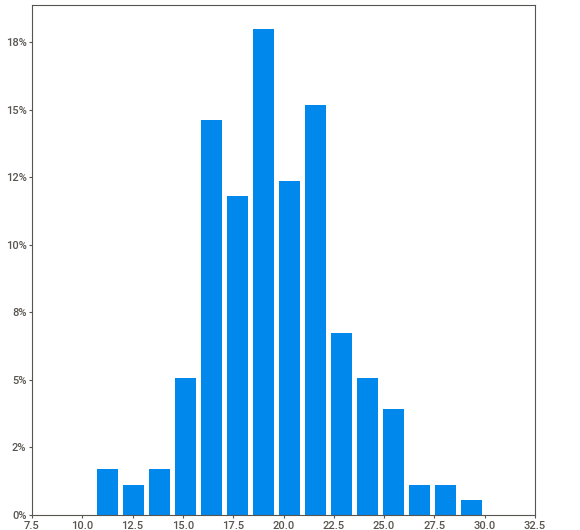
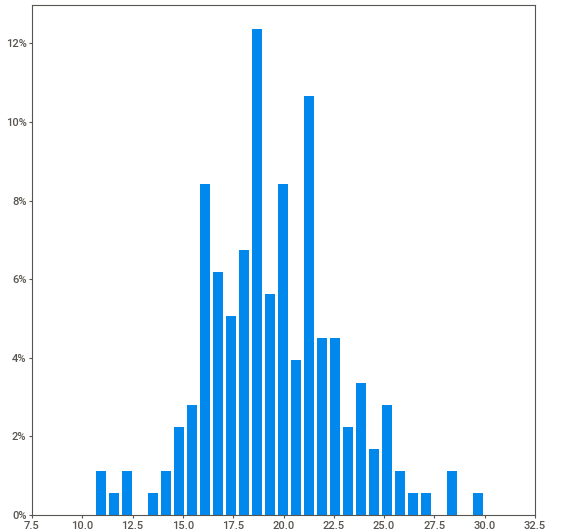
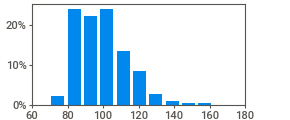
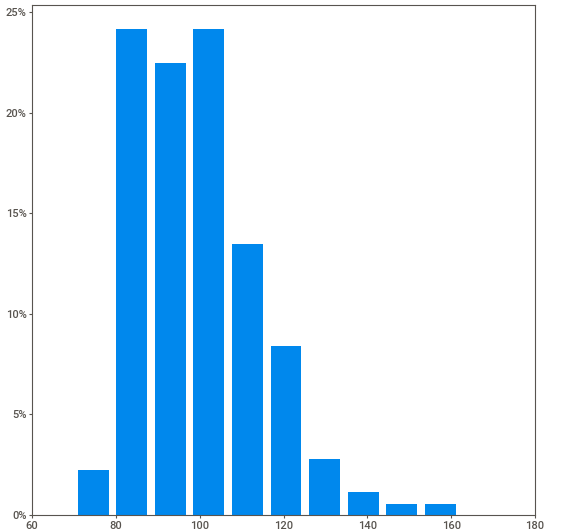
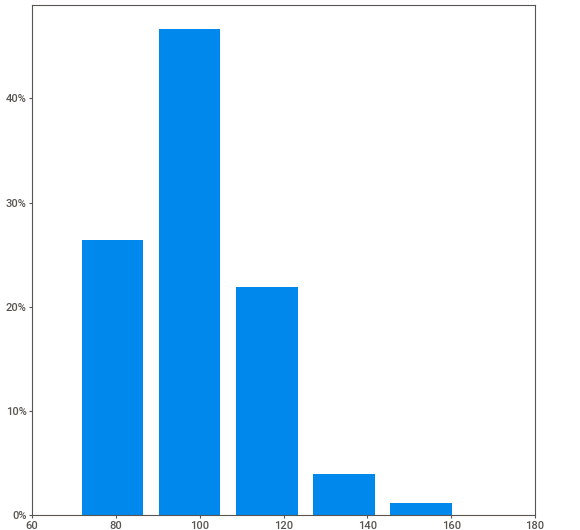
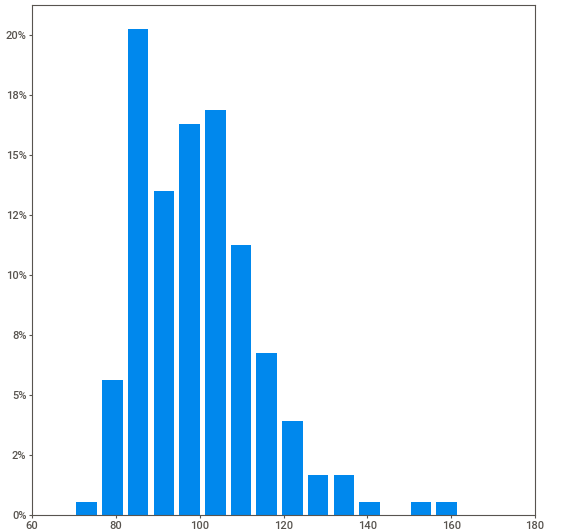
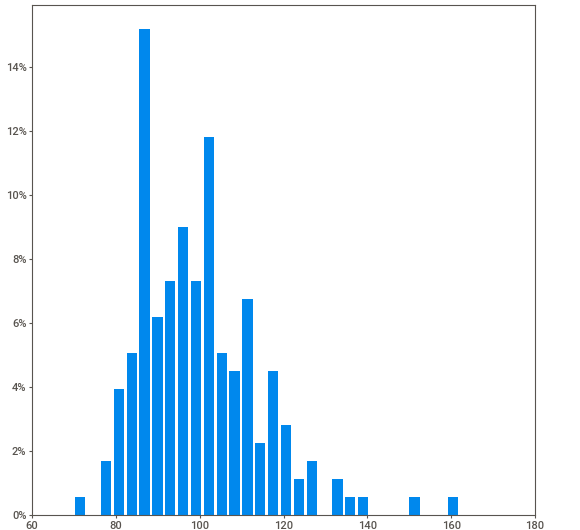
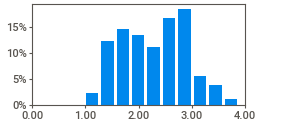
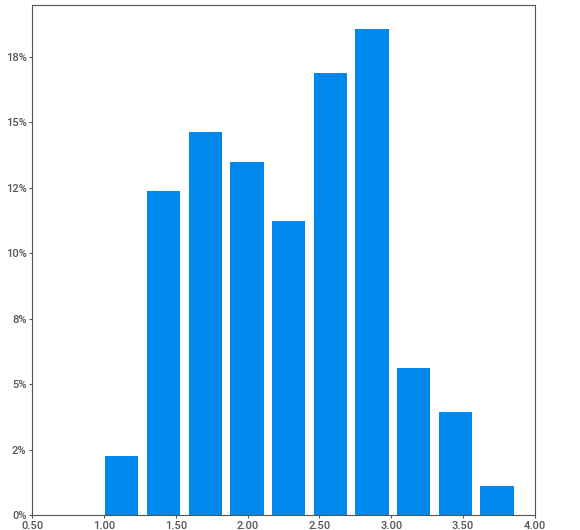
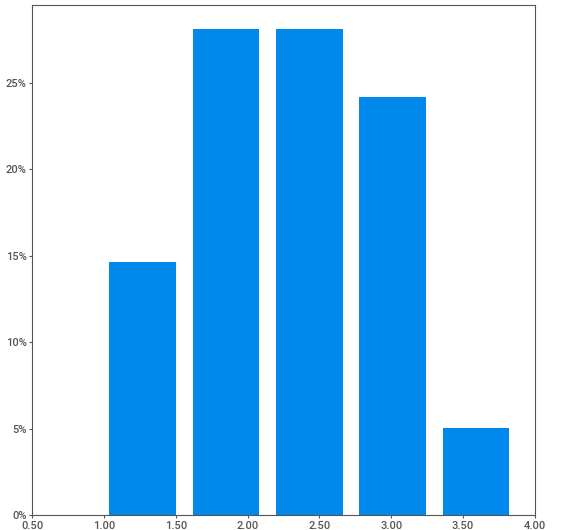
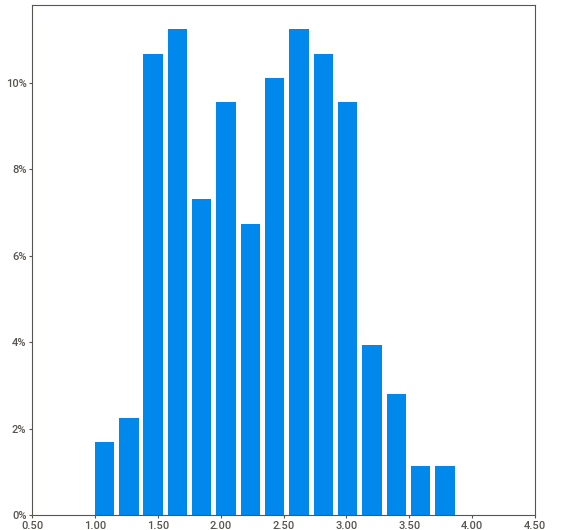
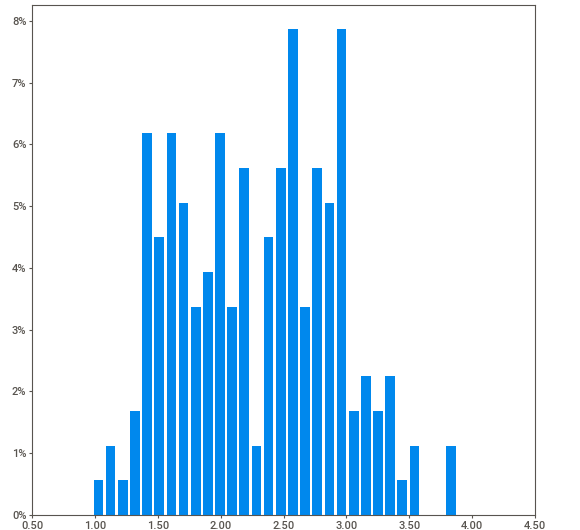
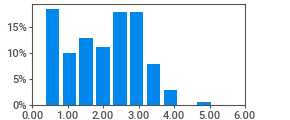
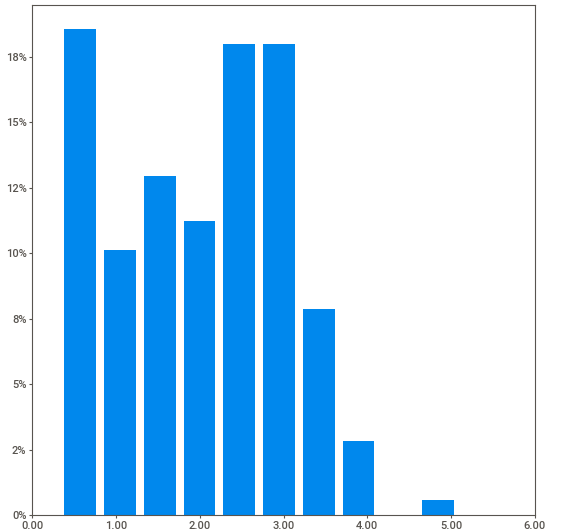
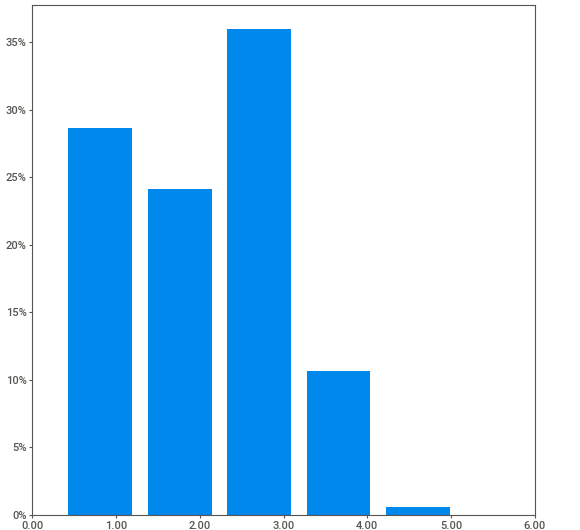
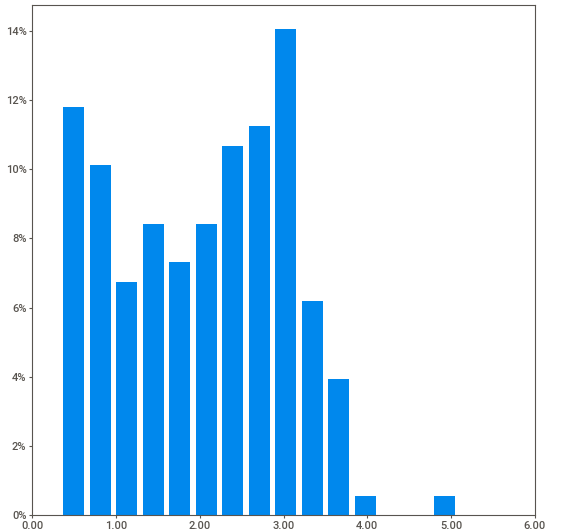
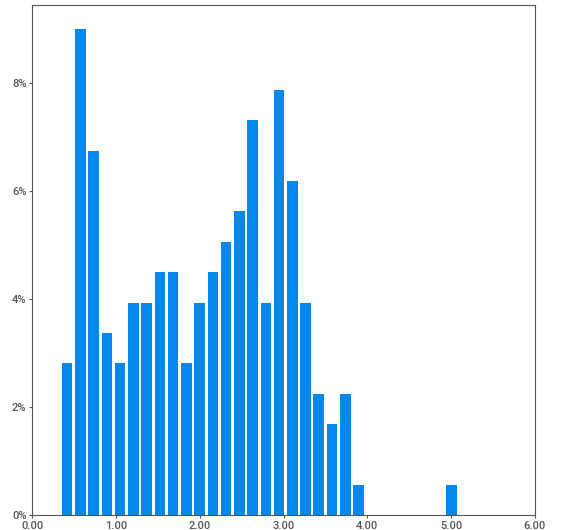
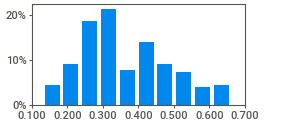
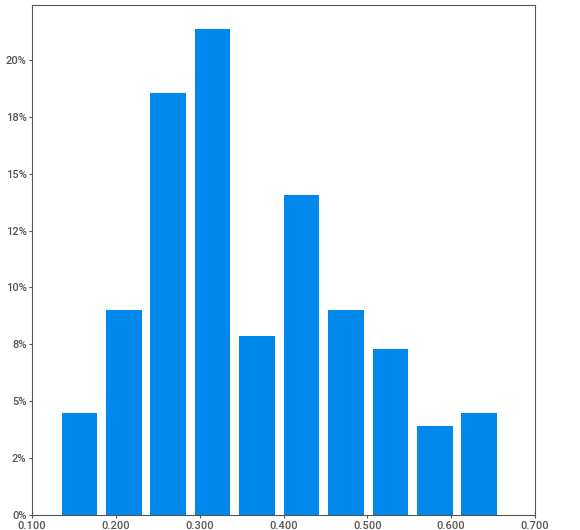
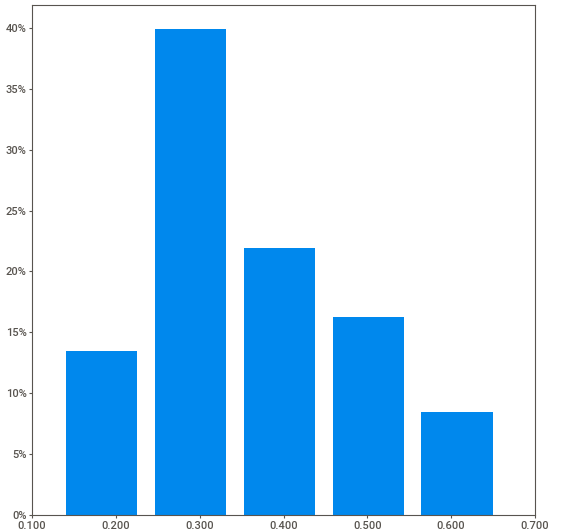
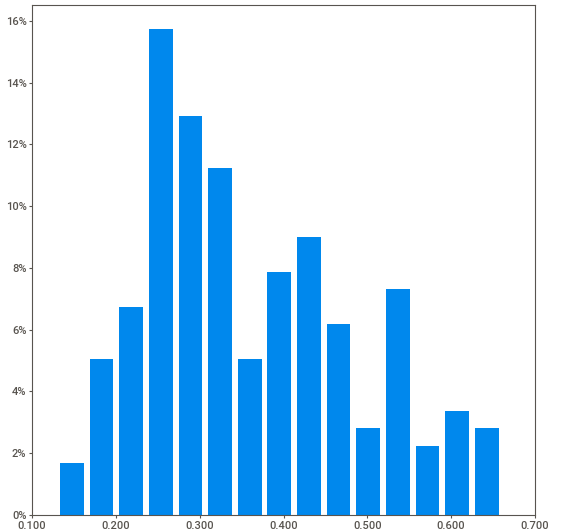
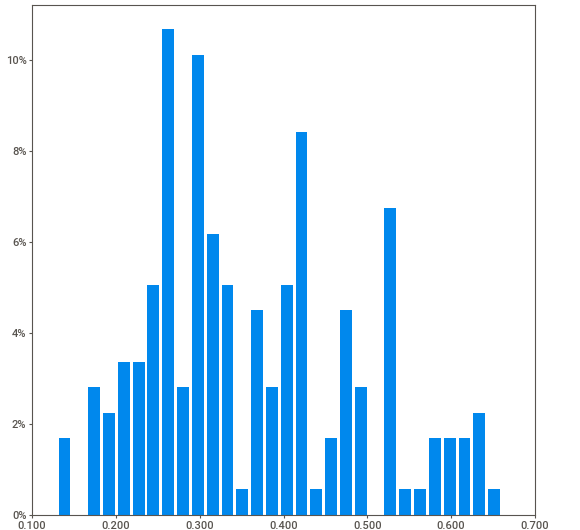
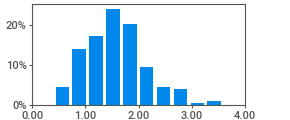
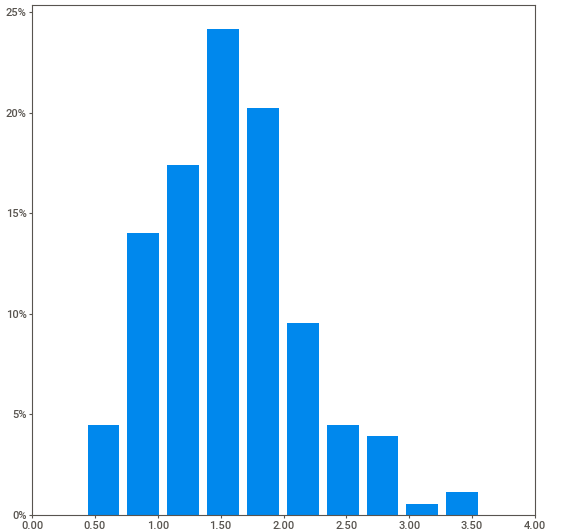
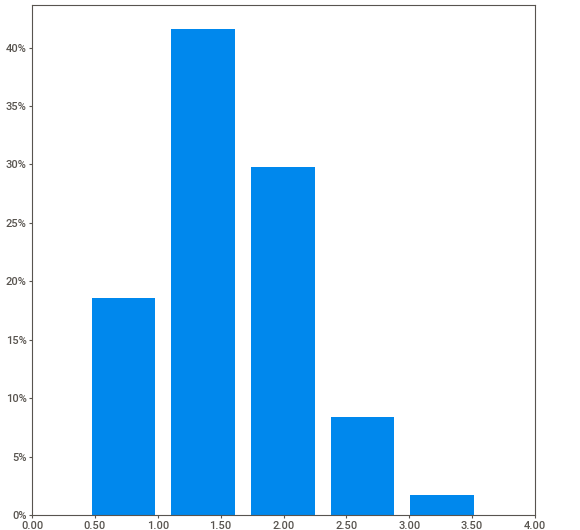
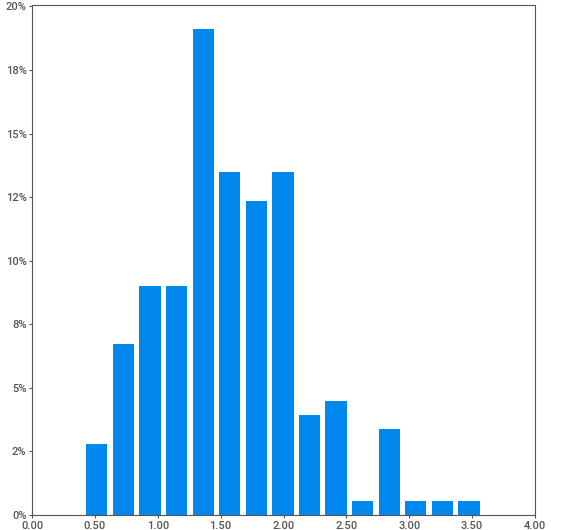
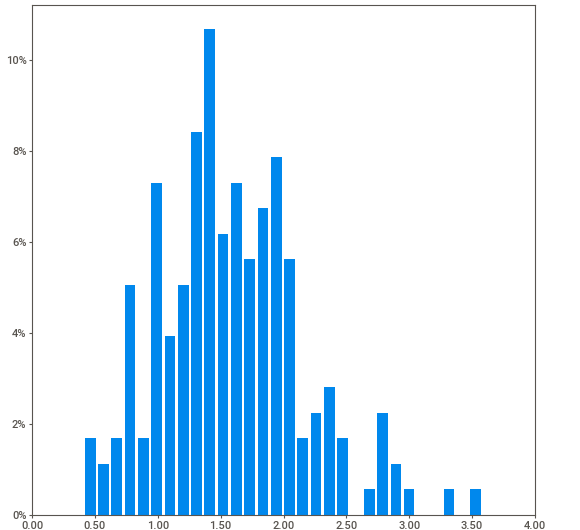
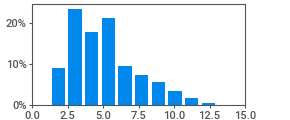
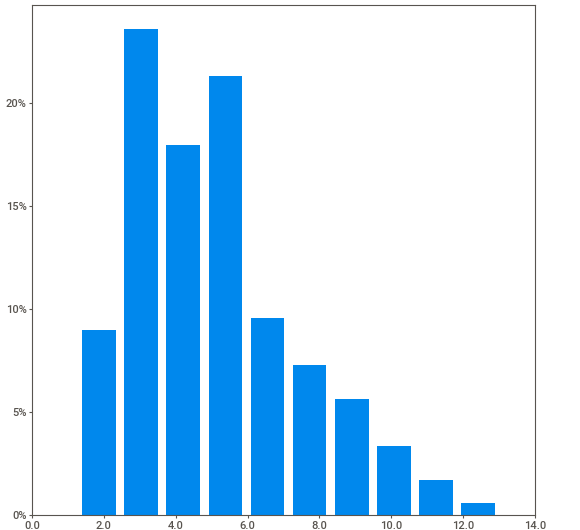
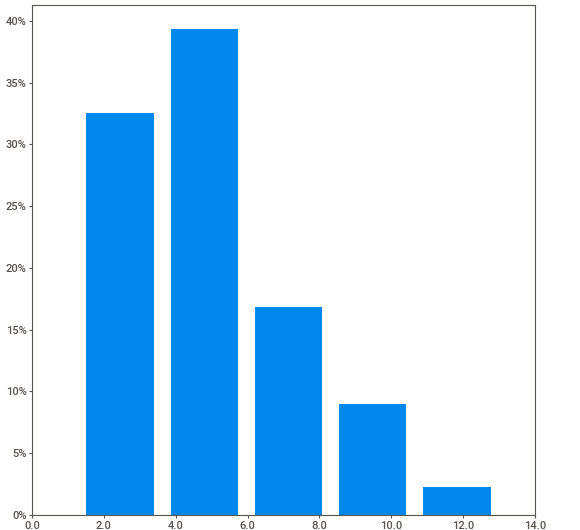
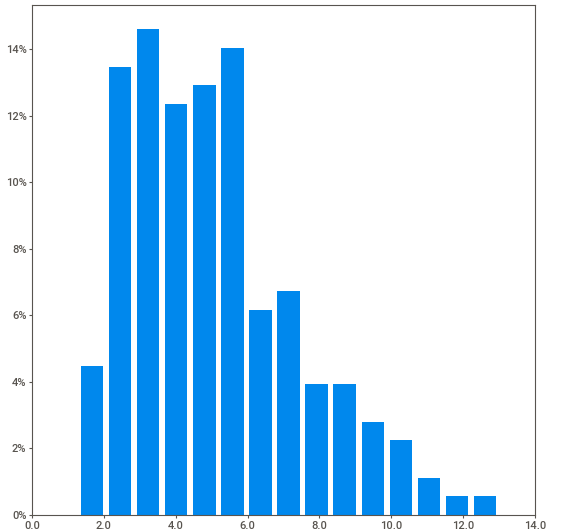
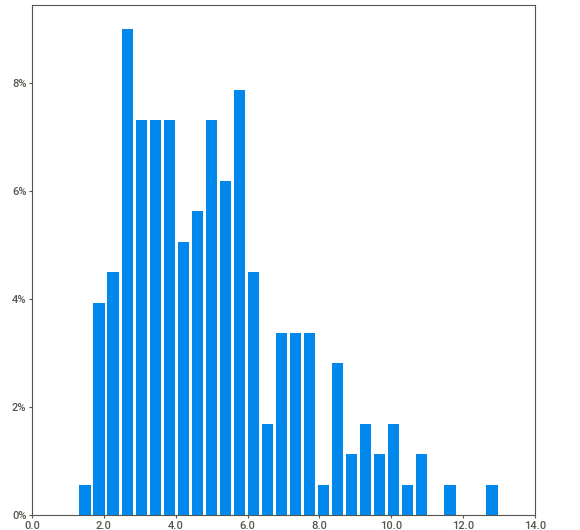
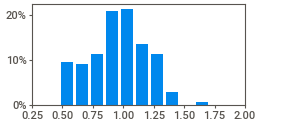
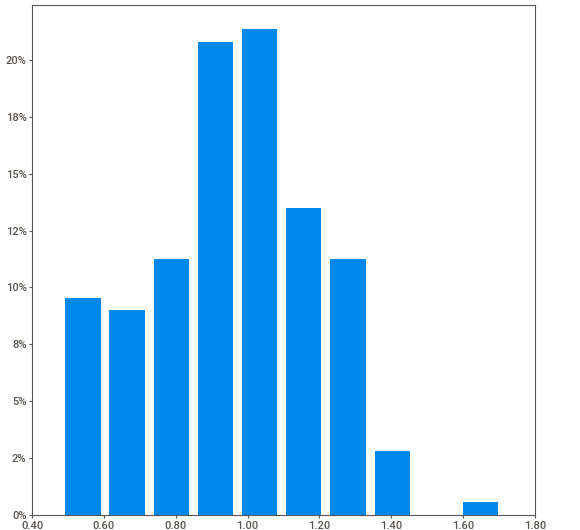
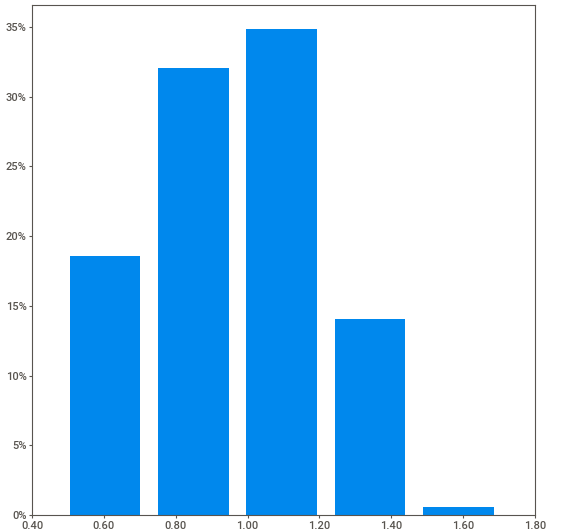
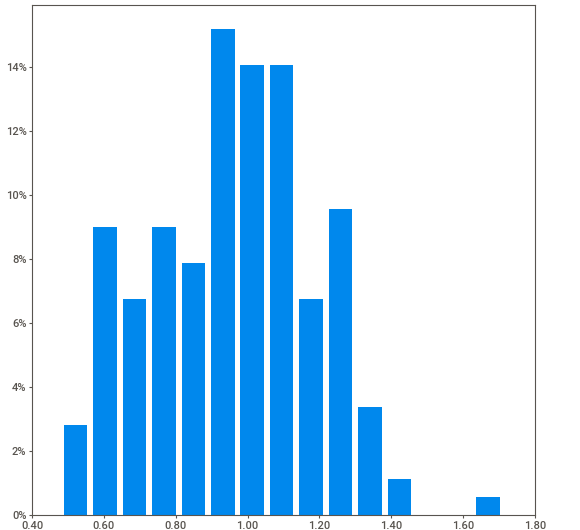
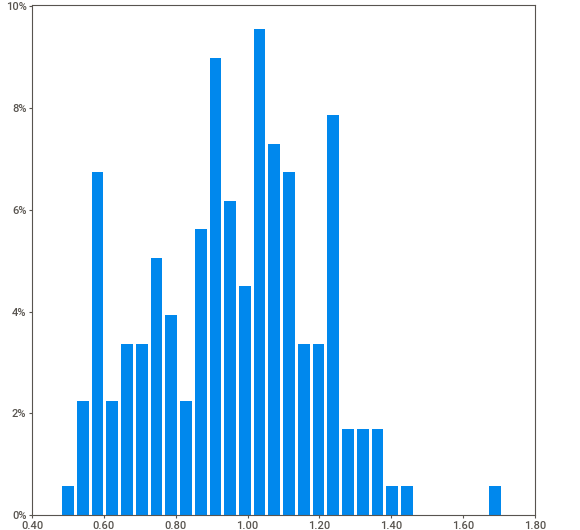
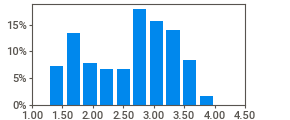
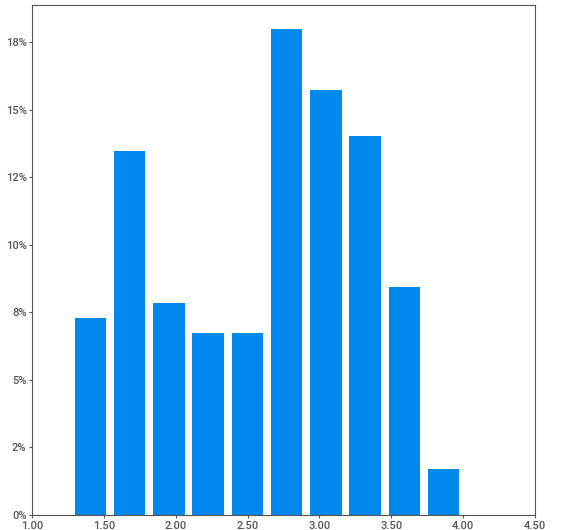
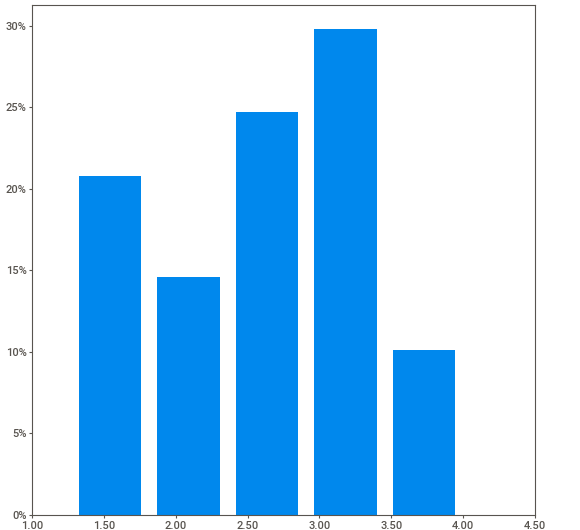
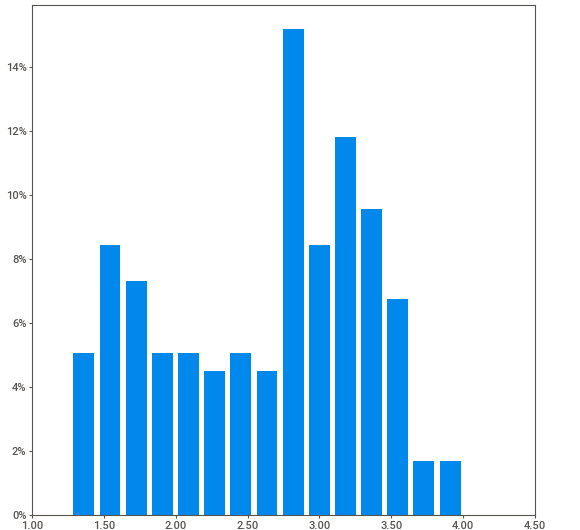
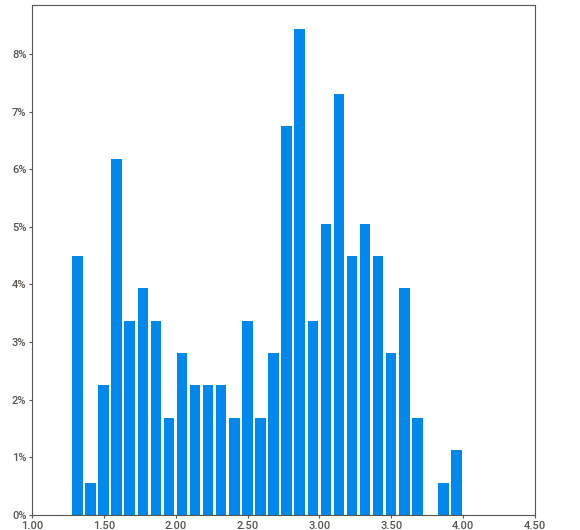
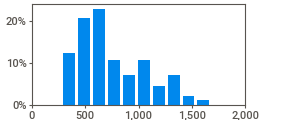
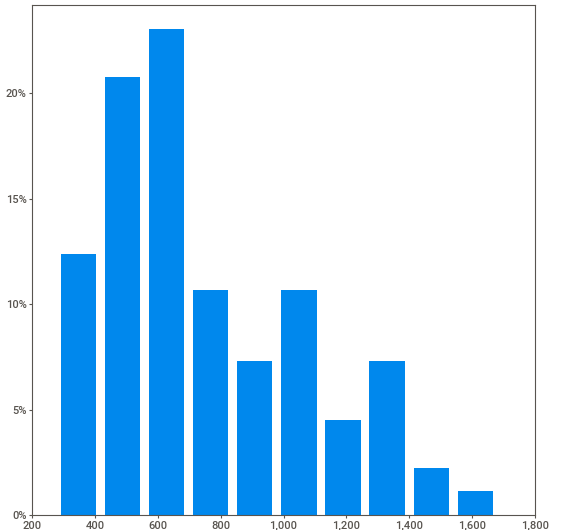
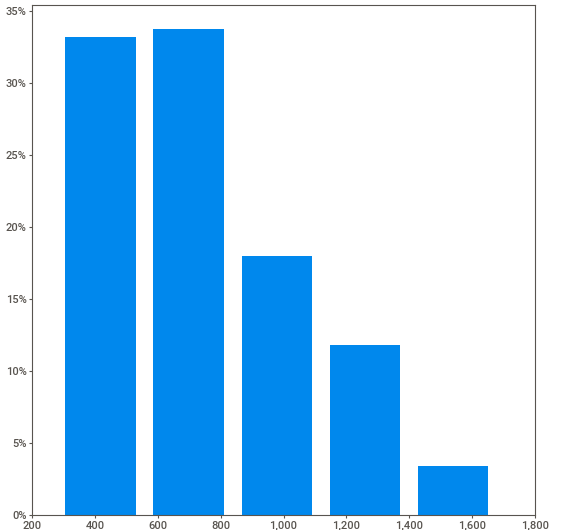
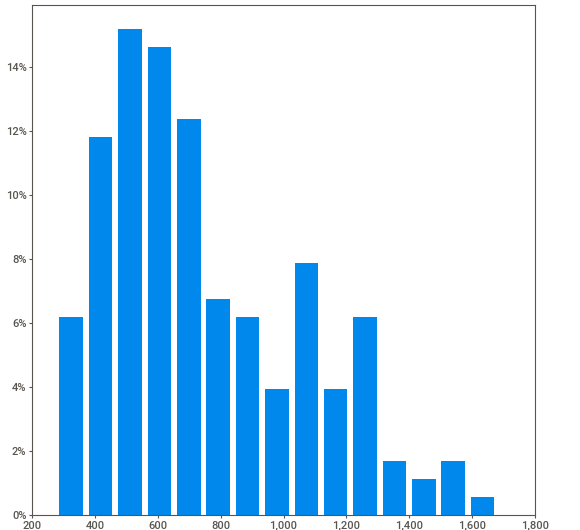
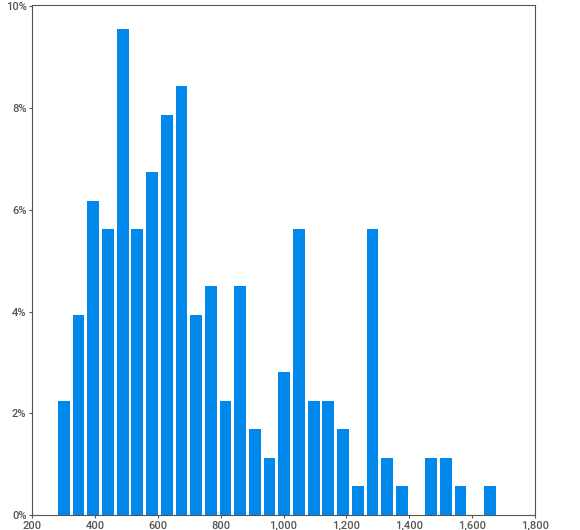
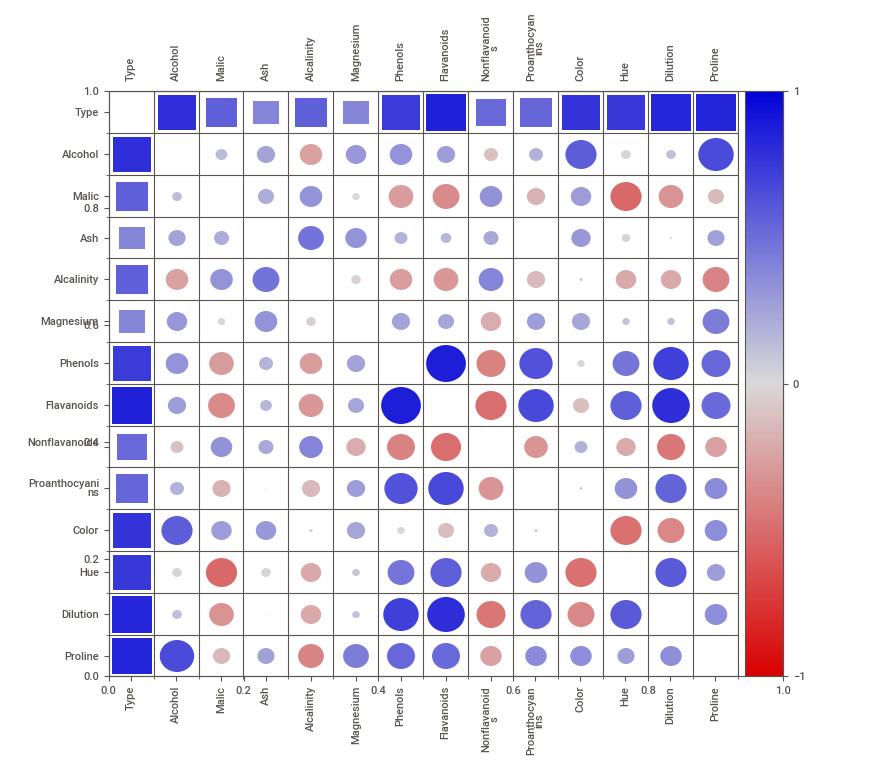
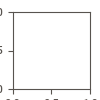

In [3]:
#using the autoEDA library to make the eda process like visualize, finding null values,datatypes and doing all the tasks related to EDA automatically
import sweetviz


autoeda=sweetviz.analyze(df)
autoeda.show_notebook() #if we only call this variable the file will be downloaded in the browser  and we can view from there

In [4]:
#from the above visualization we can all columns are continuous having histogram for each column and there appropriate measues
#Except the column type because it has only three values and it is creating a bar graph to visualize it

In [5]:
#checking the datatype and information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
#checking the shape of data

df.shape

(178, 14)

In [7]:
#checking for the null values
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
#checking the columns names 

df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [9]:
#checking the distribution of data using skew function

import matplotlib.pyplot as plt

for i in df.columns:
    a=df[i].skew()
    print(f"skewness of{i} is={a}")

skewness ofType is=0.10743112358094281
skewness ofAlcohol is=-0.051482331077134784
skewness ofMalic is=1.0396511925814442
skewness ofAsh is=-0.17669931645735712
skewness ofAlcalinity is=0.21304688642645586
skewness ofMagnesium is=1.098191054755161
skewness ofPhenols is=0.08663858640245253
skewness ofFlavanoids is=0.02534355338149103
skewness ofNonflavanoids is=0.4501513355621236
skewness ofProanthocyanins is=0.5171371722998975
skewness ofColor is=0.8685847909572548
skewness ofHue is=0.021091272199709302
skewness ofDilution is=-0.30728549895848106
skewness ofProline is=0.7678217813897322


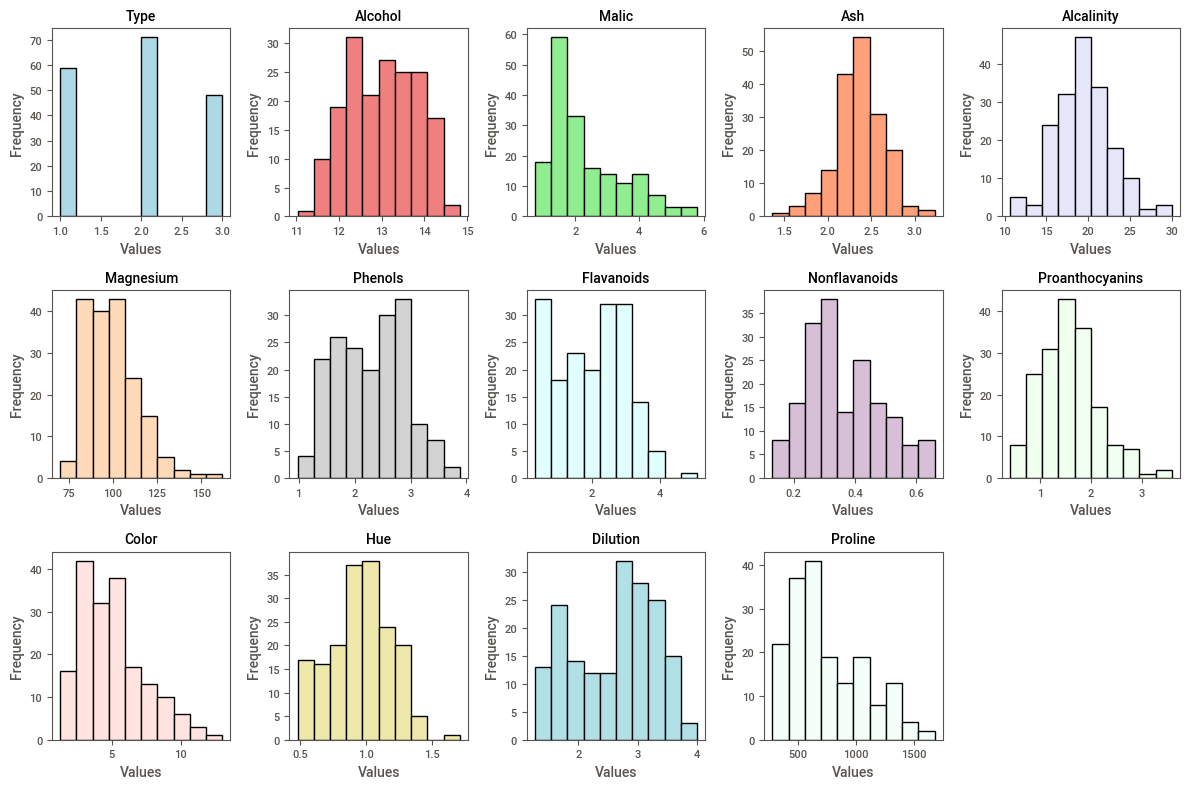

In [10]:
#creating a dashboard

import matplotlib.pyplot as plt

# Define light colors for better visualization
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lavender', 'peachpuff', 
          'lightgray', 'lightcyan', 'thistle', 'honeydew', 'mistyrose', 'palegoldenrod', 
          'powderblue', 'mintcream']

# Create subplots
fig, axes = plt.subplots(3, 5, figsize=(12, 8))  # Adjust layout to fit 14 plots
axes = axes.flatten()  # Flatten to iterate easily

# Plot each feature with unique light colors
for i, col in enumerate(df.columns):  # Using actual dataset
    if i < len(axes):  # Ensure we don’t exceed the number of available axes
        axes[i].hist(df[col], color=colors[i], edgecolor='black')
        axes[i].set_title(col, fontsize=10)  # Set column name as title
        axes[i].set_xlabel("Values")
        axes[i].set_ylabel("Frequency")

# Hide unused subplot (since 3x5 = 15, we have one extra)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  

plt.tight_layout()
plt.show()

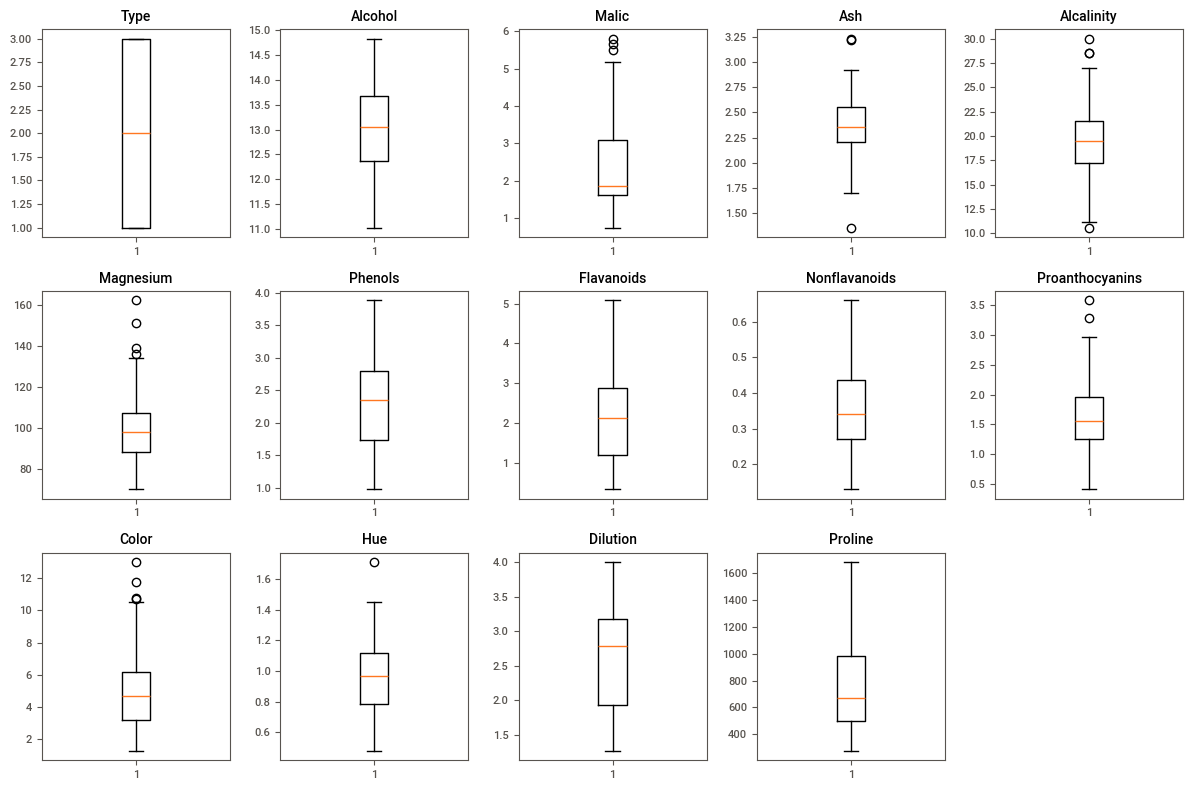

In [11]:
#creating a dashboard that contains all the boxplots which is used to detect outlayers

fig, axes = plt.subplots(3, 5, figsize=(12, 8))  # Adjust layout to fit 14 plots
axes = axes.flatten()  # Flatten to iterate easily

# creating a for loop to create a dashboard for detecting outlayers using boxplot

for i, col in enumerate(df.columns): 
    axes[i].boxplot(df[col]) 
    axes[i].set_title(col, fontsize=10)  # Set column name as title

    
# Hide unused subplot (since 3x5 = 15, we have one extra)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  

plt.tight_layout()
plt.show()

In [12]:
#finding the values of the outlayers

for i in df.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    outliers=df[i][(df[i] < lower_bound)|(df[i] > upper_bound)]
    print(f"Outliers of {i}=", outliers)
    print()
#here we can find the outlayers in some of the values and there are not more than 5% so we can remove them or cap them 

Outliers of Type= Series([], Name: Type, dtype: int64)

Outliers of Alcohol= Series([], Name: Alcohol, dtype: float64)

Outliers of Malic= 123    5.80
137    5.51
173    5.65
Name: Malic, dtype: float64

Outliers of Ash= 25     3.22
59     1.36
121    3.23
Name: Ash, dtype: float64

Outliers of Alcalinity= 59     10.6
73     30.0
121    28.5
127    28.5
Name: Alcalinity, dtype: float64

Outliers of Magnesium= 69    151
73    139
78    136
95    162
Name: Magnesium, dtype: int64

Outliers of Phenols= Series([], Name: Phenols, dtype: float64)

Outliers of Flavanoids= Series([], Name: Flavanoids, dtype: float64)

Outliers of Nonflavanoids= Series([], Name: Nonflavanoids, dtype: float64)

Outliers of Proanthocyanins= 95     3.28
110    3.58
Name: Proanthocyanins, dtype: float64

Outliers of Color= 151    10.80
158    13.00
159    11.75
166    10.68
Name: Color, dtype: float64

Outliers of Hue= 115    1.71
Name: Hue, dtype: float64

Outliers of Dilution= Series([], Name: Dilution, dtype: fl

##### outliers Treating

In [13]:
#finding the values of the outlayers

for i in df.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    outliers=df[i][(df[i] < lower_bound)|(df[i] > upper_bound)]
    print(f"Outliers of {i}=", outliers)
    print()
    
    # Capping outliers
    df[i] = df[i].clip(lower_bound, upper_bound)
    print(f"\nUpdated {i} column after capping:\n", df[i])
    print()
    print()
#outlayers removed successfully

Outliers of Type= Series([], Name: Type, dtype: int64)


Updated Type column after capping:
 0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64


Outliers of Alcohol= Series([], Name: Alcohol, dtype: float64)


Updated Alcohol column after capping:
 0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: Alcohol, Length: 178, dtype: float64


Outliers of Malic= 123    5.80
137    5.51
173    5.65
Name: Malic, dtype: float64


Updated Malic column after capping:
 0      1.7100
1      1.7800
2      2.3600
3      1.9500
4      2.5900
        ...  
173    5.3025
174    3.9100
175    4.2800
176    2.5900
177    4.1000
Name: Malic, Length: 178, dtype: float64


Outliers of Ash= 25     3.22
59     1.36
121    3.23
Name: Ash, dtype: float64


Updated Ash column after capping:
 0      2.43
1      2.14
2      2.67
3    

In [14]:
#conforming whether the outlayers where capped successfully or not

for i in df.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    outliers=df[i][(df[i] < lower_bound)|(df[i] > upper_bound)]
    print(f"Outliers of {i}=", outliers)
    print()

Outliers of Type= Series([], Name: Type, dtype: int64)

Outliers of Alcohol= Series([], Name: Alcohol, dtype: float64)

Outliers of Malic= Series([], Name: Malic, dtype: float64)

Outliers of Ash= Series([], Name: Ash, dtype: float64)

Outliers of Alcalinity= Series([], Name: Alcalinity, dtype: float64)

Outliers of Magnesium= Series([], Name: Magnesium, dtype: float64)

Outliers of Phenols= Series([], Name: Phenols, dtype: float64)

Outliers of Flavanoids= Series([], Name: Flavanoids, dtype: float64)

Outliers of Nonflavanoids= Series([], Name: Nonflavanoids, dtype: float64)

Outliers of Proanthocyanins= Series([], Name: Proanthocyanins, dtype: float64)

Outliers of Color= Series([], Name: Color, dtype: float64)

Outliers of Hue= Series([], Name: Hue, dtype: float64)

Outliers of Dilution= Series([], Name: Dilution, dtype: float64)

Outliers of Proline= Series([], Name: Proline, dtype: int64)



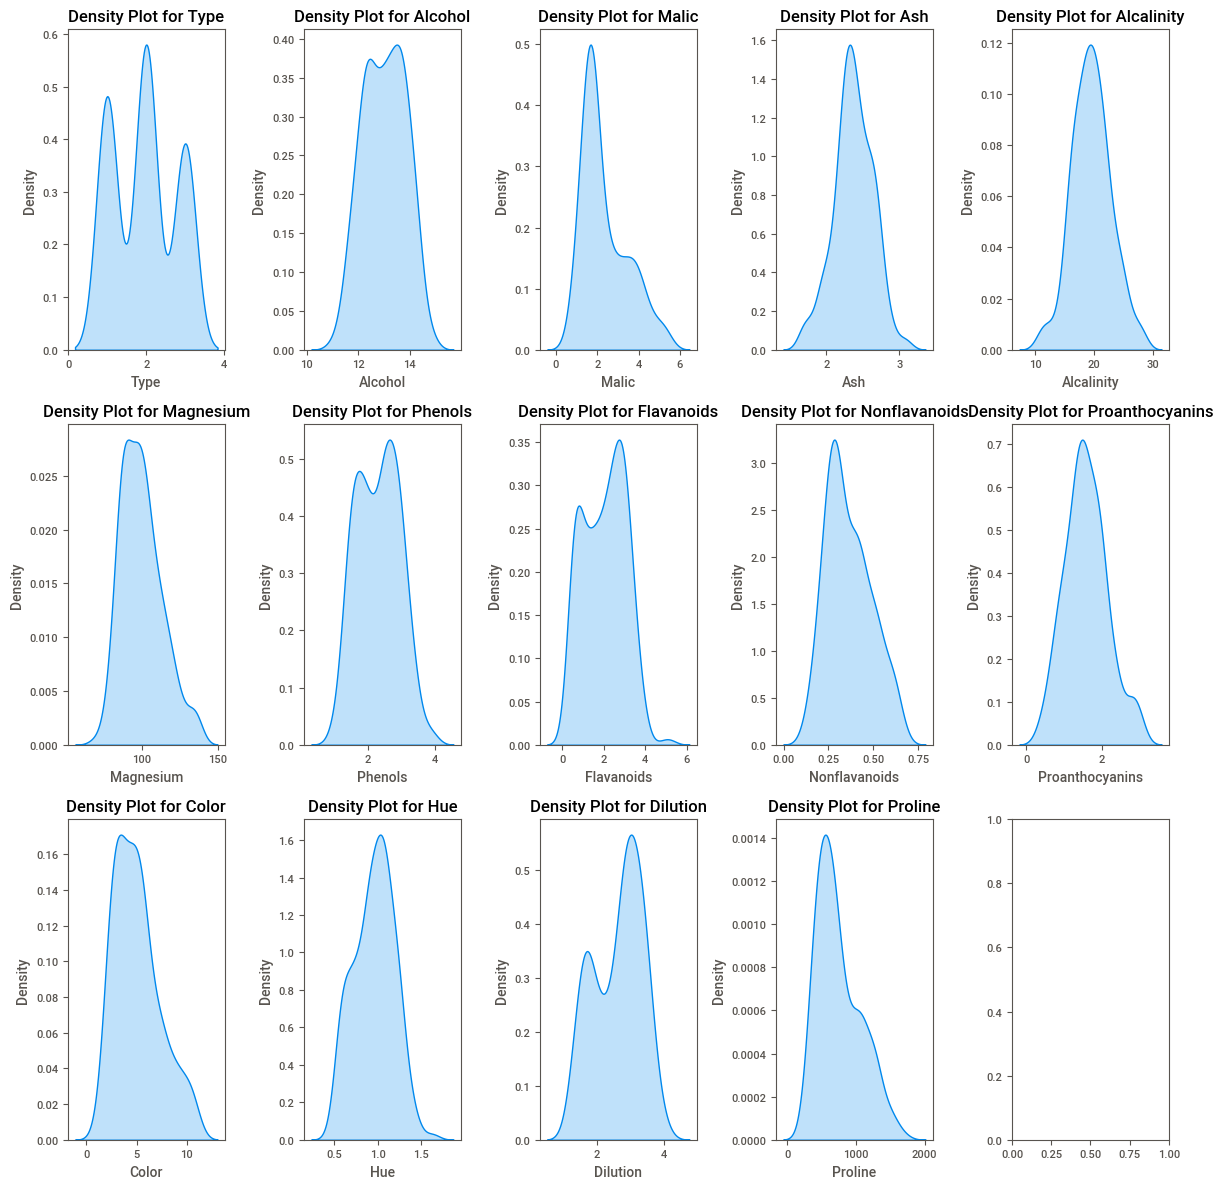

In [15]:
#creating the distribution plots

import seaborn as sns

fig, axes = plt.subplots(3, 5, figsize=(12, 12))  # Correct tuple unpacking
axes = axes.flatten()  # Flatten for easier iteration

for i, col in enumerate(df.columns):
    sns.kdeplot(data=df[col], ax=axes[i], fill=True)  
    axes[i].set_title(f"Density Plot for {col}")  
    axes[i].set_xlabel(col)  # Set actual column name as x-label
    axes[i].set_ylabel("Density")  

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

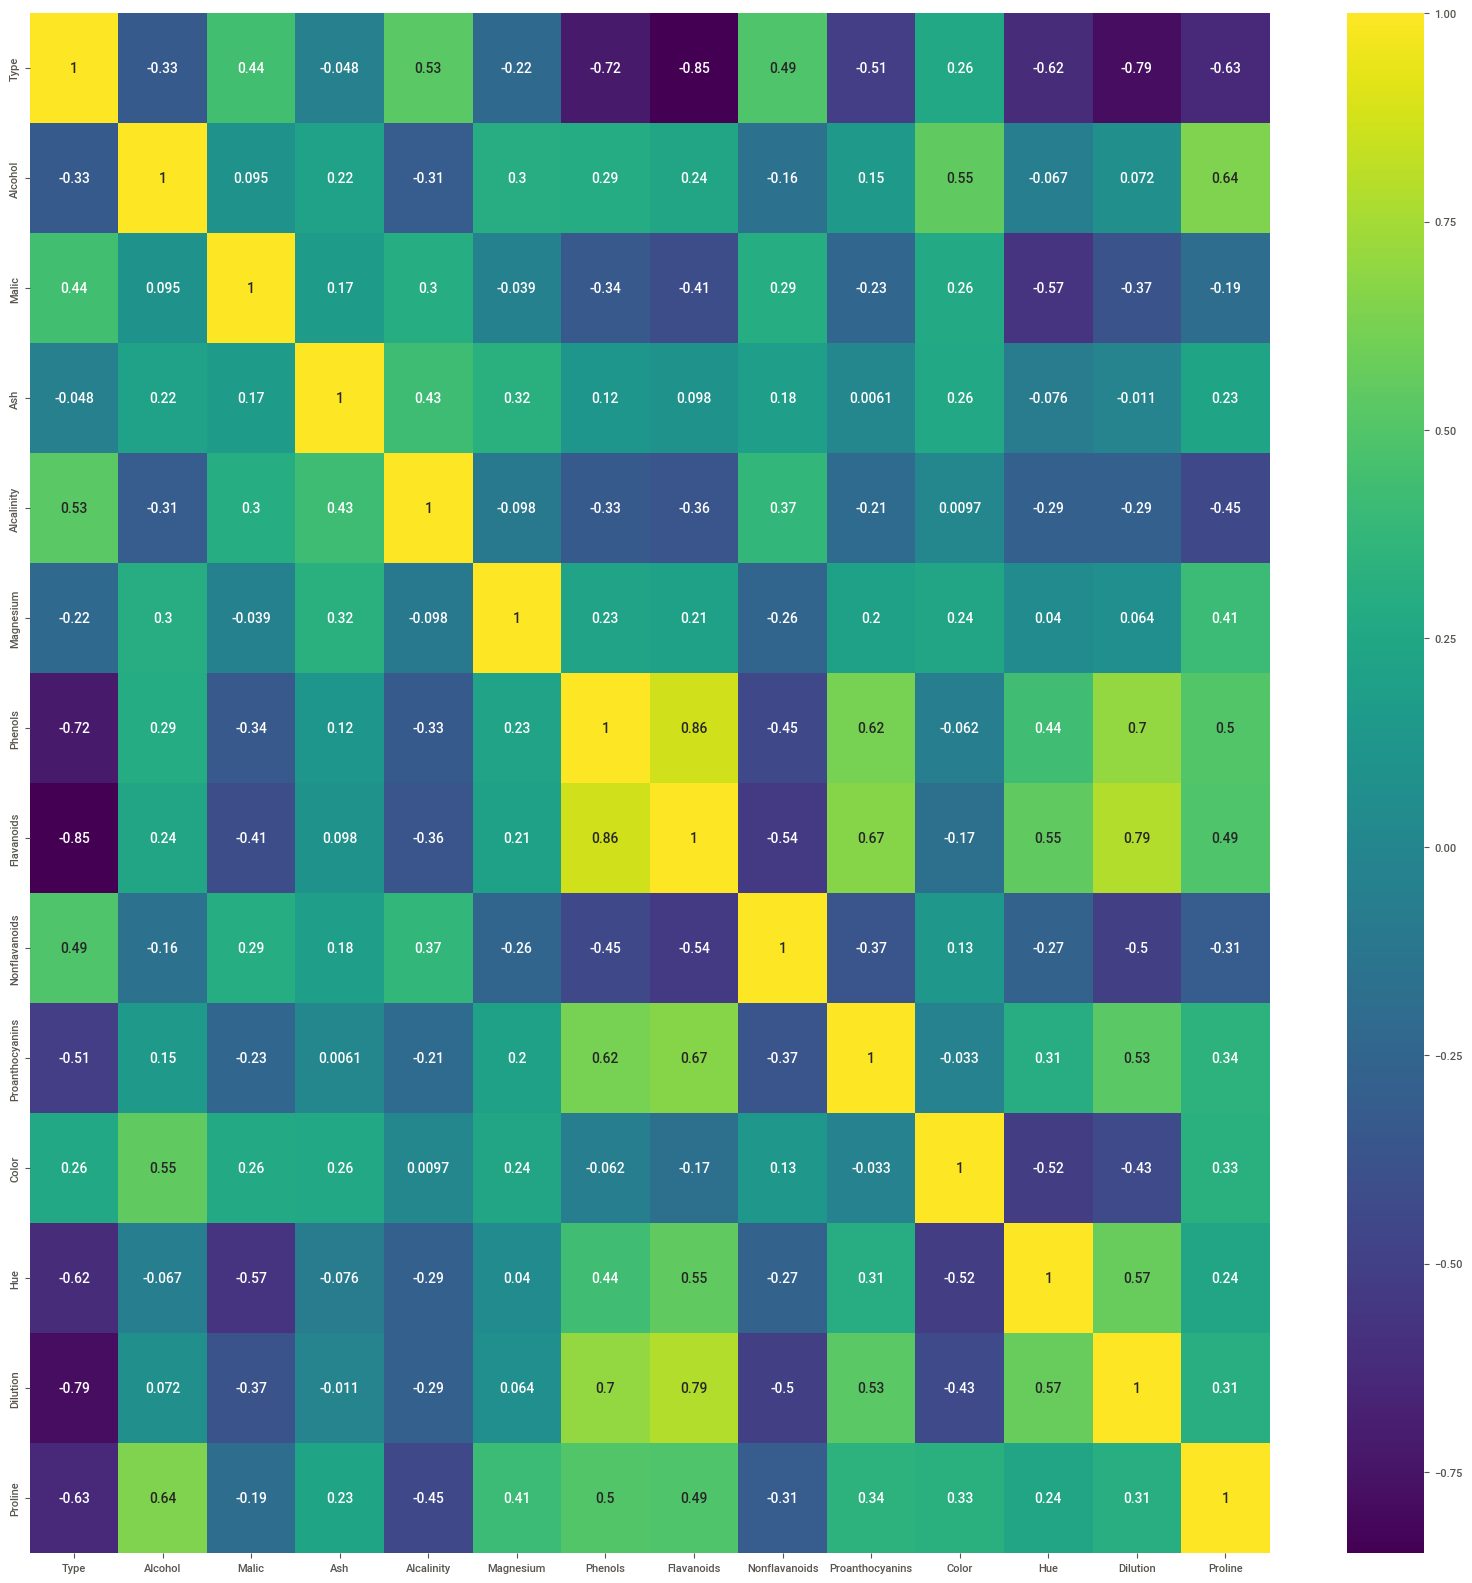

In [16]:
#checking the correlation and creating the heatmap for visualizing the relationships

corr=df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap='viridis',annot=True)
plt.show()

# Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.

In [17]:
#performing the data transformation technique to make the data lies in mean 0 and standard deviation 3

from sklearn.preprocessing import StandardScaler

scale=StandardScaler()

x=df.iloc[:,1:] #selecting yhe only continuous columns from the data

df_new=scale.fit_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new=pd.concat([df_new,df['Type']],axis=1)
df_new

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009,1
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242,1
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148,1
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574,1
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.709072,0.316696,0.311700,-0.335152,-0.985614,-1.424900,1.274310,-0.945173,1.180674,-1.399735,-1.231206,-0.021952,3
174,0.493343,1.439792,0.430781,1.074241,0.188156,-0.793334,-1.284344,0.549108,-0.316336,1.003253,-1.134784,-1.485445,0.009893,3
175,0.332758,1.777051,-0.405838,0.159191,1.533804,-1.129824,-1.344582,0.549108,-0.424137,2.289557,-1.620528,-1.485445,0.280575,3
176,0.209232,0.236596,0.012471,0.159191,1.533804,-1.033684,-1.354622,1.354888,-0.226502,1.890359,-1.576370,-1.400699,0.296498,3


In [18]:
# 2.Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

#The scree plot is used to visualize the "variance explained by each principle component" and is uusefull fro identifying the "elbow point", where addiional 
#components contribution is minimally


#using the cumulative explained variance ensures that the selected PCs capture atleast "90-95%" of total variance


#PCA identifies Principle components by calculating "eigen values"(amount of variance in given direction) and "eigen vectors"(direction of next principle components) 
#from the covariance matrix

#### scree plot

[9.98328682e-01 1.50559200e-03 9.11992937e-05 4.77528082e-05
 1.17996031e-05 8.21735905e-06 2.78605676e-06 1.47633042e-06
 1.12023777e-06 7.23813373e-07 3.59235350e-07 2.07063759e-07
 8.39295932e-08]


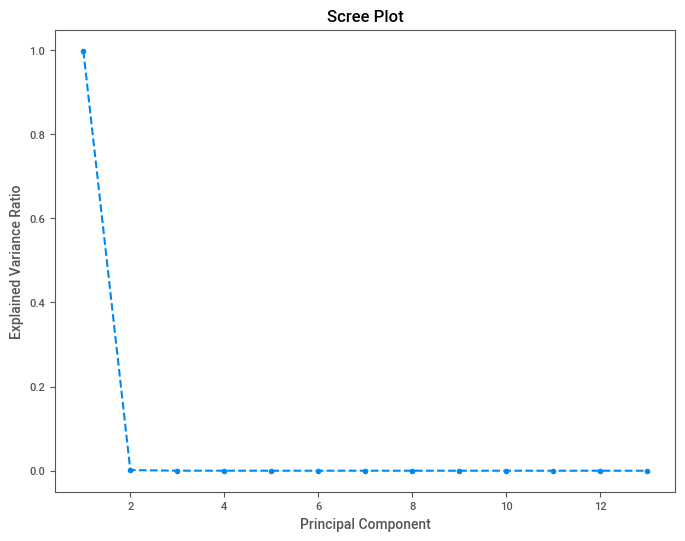

In [19]:
#performing the scree plot for selecting the deatures

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x)

# Explained variance
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

# Scree plot
plt.figure(figsize=(8,6))

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

### cummulative explained variance

[0.99832868 0.99983427 0.99992547 0.99997323 0.99998503 0.99999324
 0.99999603 0.99999751 0.99999863 0.99999935 0.99999971 0.99999992
 1.        ]


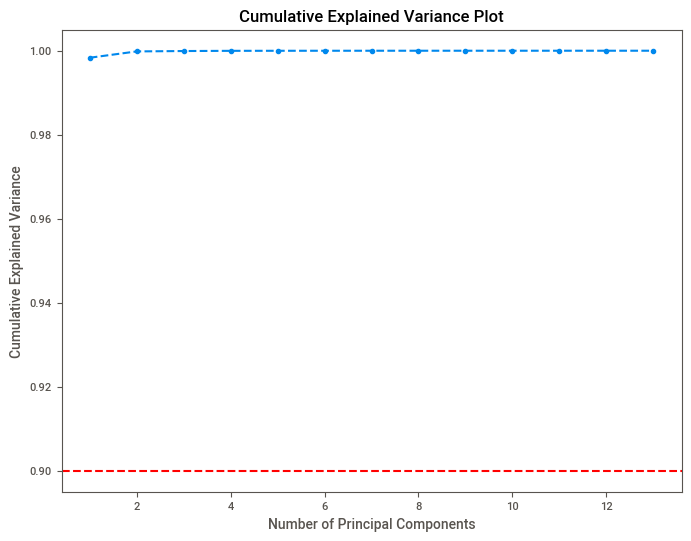

In [20]:

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.axhline(y=0.90, color='r', linestyle='--')  # Threshold (e.g., 90%)
plt.show()

In [21]:
#from the above graphs with the help of elbow we can conclude that the the principle component 2 is the best principle component

pca=PCA(n_components=2)  #pca with two columns having maximun variance

pca=pca.fit_transform(x)
pca=pd.DataFrame(pca,columns=["pca_1","pca_2"])
pca

,pca_1,pca_2
0,318.560726,21.842460
1,303.103574,-5.027187
2,438.067659,-6.143601
3,733.244572,0.689993
4,-11.572745,18.739507
...,...,...
173,-6.973940,-4.255365
174,3.135442,2.619247
175,88.456836,19.101796
176,93.454990,18.987543


In [22]:
#concating the pca and type

x_pca=pd.concat([pca,df['Type']],axis=1)
x_pca


,pca_1,pca_2,Type
0,318.560726,21.842460,1
1,303.103574,-5.027187,1
2,438.067659,-6.143601,1
3,733.244572,0.689993,1
4,-11.572745,18.739507,1
...,...,...,...
173,-6.973940,-4.255365,3
174,3.135442,2.619247,3
175,88.456836,19.101796,3
176,93.454990,18.987543,3


<Axes: xlabel='pca_1', ylabel='pca_2'>

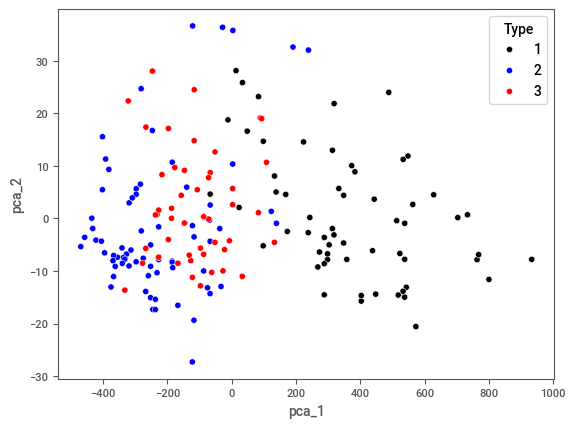

In [47]:
# Define bright colors
bright_colors = ["black", "blue", "red",]


sns.scatterplot(data=x_pca,x='pca_1',y='pca_2',hue='Type',s=20,palette=bright_colors)

# Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.


In [24]:
#orginal dataset

df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
#performing the k means clustering algorithm

from sklearn.cluster import KMeans

clusters=KMeans(n_clusters=3,random_state=37)

x=df.iloc[:,1:]  

df['k=5']=clusters.fit_predict(x)

from sklearn.metrics  import silhouette_score

score=silhouette_score(x,df['k=5'])
print("silhouette score of thr k means cluster model",score)

silhouette score of thr k means cluster model 0.571610031932576


In [26]:
df['Type'].value_counts(),df['k=5'].value_counts()

(Type
 2    71
 1    59
 3    48
 Name: count, dtype: int64,
 k=5
 2    69
 0    62
 1    47
 Name: count, dtype: int64)

In [27]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,k=5
0,1,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


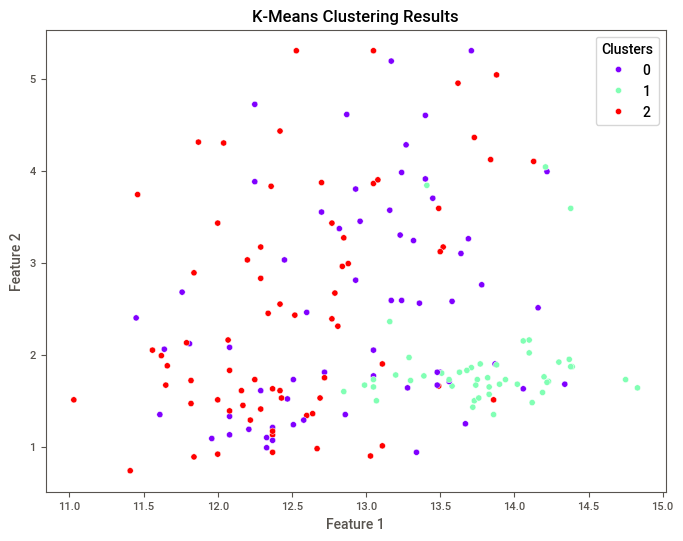

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` contains your data, `labels` contains assigned cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1], hue=df['k=5'], s=20,palette='rainbow')
plt.title('K-Means Clustering Results')                        #size of dots
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title="Clusters")
plt.show()

In [29]:
#Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

#The silhouette score ranges from -1 to 1, where:
#- Close to 1 → Well-defined clusters.
#- Close to 0 → Overlapping clusters.
#- Negative → Poor clustering.

from sklearn.metrics import silhouette_score

score=silhouette_score(x,df['k=5'])
print("silouette score",score)


#2.Davies–Bouldin Index
#This metric measures the average similarity between clusters—lower values indicate better clustering.



from sklearn.metrics import davies_bouldin_score

score= davies_bouldin_score(x,df['k=5'])
print(f'Davies–Bouldin Index: {score:.3f}')



#we have to follow any one score for checking  the accuracy so i consider silhouette score

silouette score 0.571610031932576
Davies–Bouldin Index: 0.533


# Task 4: Clustering with PCA Data:

1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.


In [30]:
#applying the kmeans algorithm on same pca transformed dataset (pca dataset) which was the output of task 2 


kmeans_pca=KMeans(n_clusters=3,random_state=37)

#fitting the result obtained from the pca 

labels_pca=kmeans_pca.fit_predict(x_pca)

label_pca=pd.DataFrame(labels_pca,columns=['kmenas_to_pca'])
label_pca

,kmenas_to_pca
0,1
1,1
2,1
3,1
4,0
...,...
173,0
174,0
175,0
176,0


In [31]:
#2 Visualize the clustering results obtained from PCA-transformed data.

x_pca

,pca_1,pca_2,Type
0,318.560726,21.842460,1
1,303.103574,-5.027187,1
2,438.067659,-6.143601,1
3,733.244572,0.689993,1
4,-11.572745,18.739507,1
...,...,...,...
173,-6.973940,-4.255365,3
174,3.135442,2.619247,3
175,88.456836,19.101796,3
176,93.454990,18.987543,3


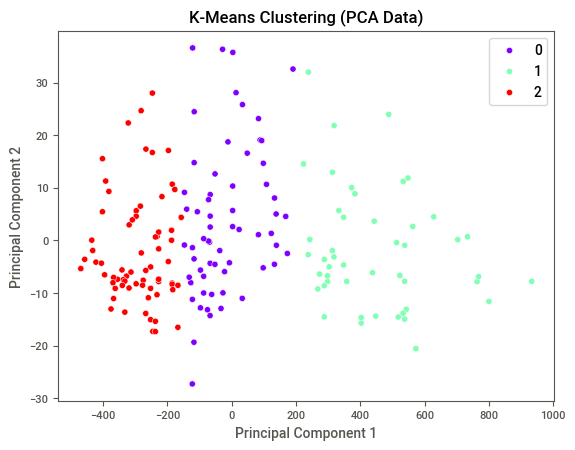

In [48]:
#visualizing the results of scatter

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=x_pca.iloc[:, 0], y=x_pca.iloc[:,1], hue=labels_pca,s=20, palette='rainbow')
plt.title("K-Means Clustering (PCA Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [33]:
#Compare the clustering results from PCA-transformed data with those from the original dataset

print("results using PCA:\n",df['Type'].value_counts())
print()

print("results using kmeans:\n",df['k=5'].value_counts())
print()

print("results using kmeans_to_pca:\n",label_pca.value_counts())
print()

results using PCA:
 Type
2    71
1    59
3    48
Name: count, dtype: int64

results using kmeans:
 k=5
2    69
0    62
1    47
Name: count, dtype: int64

results using kmeans_to_pca:
 kmenas_to_pca
2                69
0                62
1                47
Name: count, dtype: int64



In [34]:
print("From the above results we can conclude that the result optained by PCA and KMeans results are different")
print()
print("The results obtained from the KMeans and the results from PCA to Kmeans are same") 


From the above results we can conclude that the result optained by PCA and KMeans results are different

The results obtained from the KMeans and the results from PCA to Kmeans are same


In [35]:
from sklearn.metrics import silhouette_score

score=silhouette_score(x,df['k=5'])
print("silouette score of KMeans data with k=5:",score)

print(f"Sihouette score(PCA data)              : {silhouette_score( x_pca,labels_pca)}")

silouette score of KMeans data with k=5: 0.571610031932576
Sihouette score(PCA data)              : 0.5726717232674166


# Task 5: Comparison and Analysis:
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.

In [36]:
print("1 Ans:We can see the silhoutte score for kmeans=0.5716 and for PCA=0.5726 so we can say '{Kmeans on PCA-transformed data gives best result}'")
print()
print("The higher silhouette score in PCA-transformed data suggests that clustering is slightly more well-defined after dimensionality reduction. However, the difference is very small, meaning PCA did not significantly change clustering performance—it mostly helped reduce complexity while preserving structure.")

1 Ans:We can see the silhoutte score for kmeans=0.5716 and for PCA=0.5726 so we can say '{Kmeans on PCA-transformed data gives best result}'

The higher silhouette score in PCA-transformed data suggests that clustering is slightly more well-defined after dimensionality reduction. However, the difference is very small, meaning PCA did not significantly change clustering performance—it mostly helped reduce complexity while preserving structure.


In [37]:
print("2 Ans:We cant see any similarity in clustering results because the results obtained from kmeans and PCA-transformed clusters are same")

2 Ans:We cant see any similarity in clustering results because the results obtained from kmeans and PCA-transformed clusters are same


In [38]:
print("3 Ans:For these problem we cant see much similarity but difinitely dimensional reduction   will difenetly make some impack on cluster and computation speed for these problem there is no significant impact" )

3 Ans:For these problem we cant see much similarity but difinitely dimensional reduction   will difenetly make some impack on cluster and computation speed for these problem there is no significant impact


In [39]:
print("4 Ans:- PCA reduces the number of features, making clustering faster and less resource-intensive.- Without PCA, clustering on a high-dimensional dataset can        be slower and more complex.")
print()
print("PCA removes noise and redundant features, potentially improving cluster separation.- However, sometimes original features contain important information that PCA might discard.")
print()
print("- PCA reduces data to 2 or 3 principal components, allowing better visual representation of clusters.- Without PCA, it's hard to visualize clustering in high-dimensional space.")

4 Ans:- PCA reduces the number of features, making clustering faster and less resource-intensive.- Without PCA, clustering on a high-dimensional dataset can        be slower and more complex.

PCA removes noise and redundant features, potentially improving cluster separation.- However, sometimes original features contain important information that PCA might discard.

- PCA reduces data to 2 or 3 principal components, allowing better visual representation of clusters.- Without PCA, it's hard to visualize clustering in high-dimensional space.


# Task 6: Conclusion and Insights

1.	Summarize the key findings and insights from the assignment.
2.	Discuss the practical implications of using PCA and clustering in data analysis.
3.	Provide recommendations for when to use each technique based on the analysis conducted.

In [40]:
print("=> PCA slightly improved clustering performance (0.5716 → 0.5727), but the gain is minimal.")
print()

print("=> Dimensionality reduction did not drastically impact cluster separation.")
print()

print("=> If the dataset had higher dimensions (e.g., 20+ features), PCA would be more beneficial.")
print()
print("=> For this case, using raw features is just as effective as using PCA.")


=> PCA slightly improved clustering performance (0.5716 → 0.5727), but the gain is minimal.

=> Dimensionality reduction did not drastically impact cluster separation.

=> If the dataset had higher dimensions (e.g., 20+ features), PCA would be more beneficial.

=> For this case, using raw features is just as effective as using PCA.
